Loading dataset...
Preprocessing...
Running PCA...


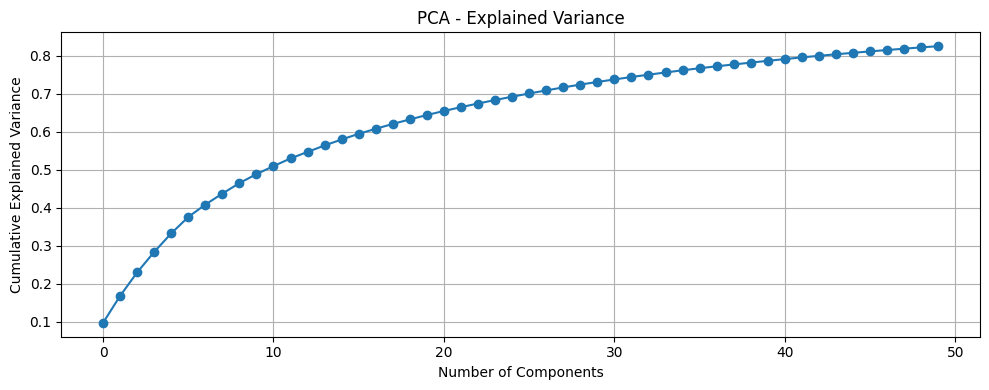

Clustering using KMeans...
Evaluating clustering...
Silhouette Score: 0.0817
✅ Done! Results saved as image_stage1_results.pkl


In [1]:
# Image Clustering for IIT-M EPGD Data Science Project
# Author: <your name>
# Date: <date>

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import matplotlib.pyplot as plt

# Step 1: Load image data (uploaded file)
# Ensure 'unlabelled_train_data_images.npy' is uploaded before running this
print("Loading dataset...")
images = np.load("../data/unlabelled_train_data_images.npy")

# Step 2: Flatten and normalize image pixels
print("Preprocessing...")
X = images.reshape(images.shape[0], -1).astype("float32") / 255.0

# Optional: Use a smaller sample if on memory-constrained systems
# X = X[:10000]  # Uncomment for Colab free tier if needed

# Step 3: PCA for dimensionality reduction
print("Running PCA...")
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X)

# Visualize explained variance ratio (for your PPT)
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_variance_plot.png")
plt.show()

# Step 4: Clustering using KMeans
print("Clustering using KMeans...")
kmeans = KMeans(n_clusters=10, random_state=42)
Y = kmeans.fit_predict(X_pca)

# Step 5: Evaluate clustering with silhouette score
print("Evaluating clustering...")
score = silhouette_score(X_pca, Y)
print(f"Silhouette Score: {score:.4f}")

# Step 6: Save results for reuse
output = {
    "pca_features": X_pca,
    "cluster_labels": Y,
    "silhouette_score": score
}

with open("image_stage1_results.pkl", "wb") as f:
    pickle.dump(output, f)

print("✅ Done! Results saved as image_stage1_results.pkl")
